In [239]:
import numpy as np
from abc import ABC, abstractmethod
from matplotlib import pyplot as plt

In [240]:
def generate_dataset(m: int, n: int, use_zero : bool):
    """Generates training set with m examples in R^n. if use_zero then example values are 0 or 1, else it is -1 or +1."""
    X = np.random.randint(0, 2, (m, n))
    if not use_zero:
        X = 2*X - 1 # replaces 0 with -1
    y = X[:, 0] 
    return X, y

In [63]:
class Model(ABC):

    @abstractmethod
    def fit(self, X_train, y_train):
        """Fit model to training set."""

    @abstractmethod
    def error(self, X_test, y_test):
       """Get average misclassification error on given test set."""
    

In [241]:
class LeastSquares(Model):

    def __init__(self):
        self.w = None
    
    def fit(self, X_train, y_train):
        self.w = np.linalg.lstsq(X_train, y_train)[0] # TODO: redo with matrix alg

    def error(self, X_test, y_test):
        """Get average misclassification error on given test set"""
        y_pred = np.sign(X_test @ self.w)
        return np.mean(y_pred != y_test)



In [ ]:
class Perceptron(Model)

In [242]:
X_train, y_train = generate_dataset(10, 3, use_zero=False)

ls = LeastSquares()

ls.fit(X_train, y_train)

X_test, y_test = generate_dataset(3, 3, use_zero=False)
print(ls.error(X_test, y_test))

0.0


In [272]:
def sample_complexity(n : int, model : Model, num_trials : int = 1000, test_size : int = 100) -> int:

    results = []

    for _ in range(num_trials):
        m = 1
        while True:
            X_train, y_train = generate_dataset(m, n, use_zero=False)
            X_test, y_test = generate_dataset(test_size, n, use_zero=False)
            model.fit(X_train, y_train)
            error = model.error(X_test, y_test)
            if error <= 0.1:
                break
            m += 1
        results.append(m)
    
    return sum(results) / len(results)


sample_complexity(3, LeastSquares(), num_trials=4000, test_size=1000)



2.96875

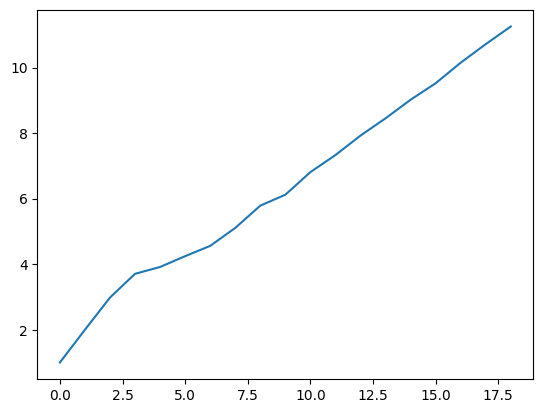

In [274]:
results = [sample_complexity(n, LeastSquares(), num_trials=2000, test_size=1000) for n in range(1, 20)]


plt.plot(results)
